# Demo2: Simple Harmonic Oscillator with RK2/RK4

In this jupyter notebook, we will learn how to use the Runge-Kutta 2/4 methods to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
\frac{dx}{dt} = v,
$$
and 
$$
\frac{dv}{dt} = a.
$$


### Runge-Jutta methods

Higher-order explicit schemes.

* RK2

$$
y_{k+1} = y_k + \frac{h_k}{2}(k_1 + k2),
$$
where $k_1 = f(t_k, y_k)$ and $k_2 = f(t_k+h_k, y_k + h_k k1)$.

* RK4

$$
y_{k+1} = y_k + \frac{h_k}{6}(k_1 +2k_2 +2k_3+k_4),
$$
where $k_1= f(t_k,y_k)$, $k_2=f(t_k+h_k/2, y_k + (h_k/2)k_1)$,
$k_3=f(t_k+h_k/2, y_k + (h_k/2)k_2)$, and $k_4=f(t_k+h_k, y_k+h_k k3)$.


### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: Redo demo1 with the RK2 method
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [2]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the RK2 method
#

# Step 1: set up the parameters of the problem
A=1
k=1
m=1
dt = 0.01
omega0 = np.sqrt(k/m)

def sho_rk2(A, k, m, dt, t_max):
    # Step 2: set up the time and solution arrays
    times = np.arange(0, t_max, dt)
    x = np.zeros_like(times)
    v = np.zeros_like(times)
    # Step 3: set up the initial conditions
    x[0] = 1
    v[0] = 0
    # Step 4: solve the difference equation using the RK2 method
    for i in range(1,len(times)):
        y = np.array([x[i-1], v[i-1]])  # y = (x , v)
        t = times[i-1]
        h = dt
        
        def f(t, y):
            return np.array([y[1], -omega0**2*y[0]])
            
        k1 = f(t, y)

        k2 = f(t+dt, y+k1*dt)

        ynext = y + (k1+k2)*dt/2

        x[i] = ynext[0]
        v[i] = ynext[1]

    return times, x, v

times, x, v = sho_rk2(A, k, m, dt, 20)

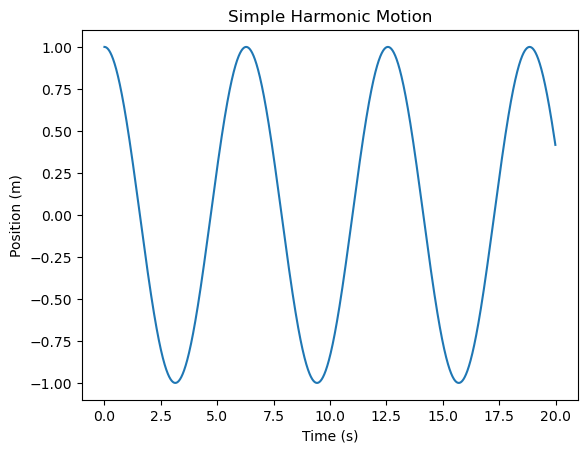

In [4]:
# Step 5: plot the solution
plt.plot(times,x)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.show()

We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).

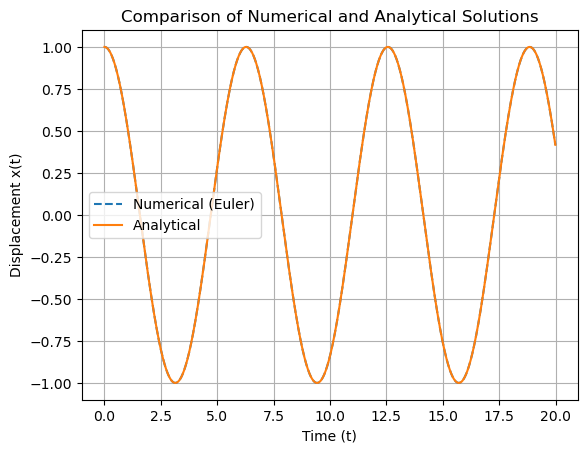

In [5]:
# Step 6: evaluate the analytical solution

# TODO:
x_analytical = A * np.cos(omega0 * times)

# Plot numerical and analytical solutions
plt.plot(times, x, label="Numerical (Euler)", linestyle='--')
plt.plot(times, x_analytical, label="Analytical", linestyle='-')
plt.xlabel("Time (t)")
plt.ylabel("Displacement x(t)")
plt.title("Comparison of Numerical and Analytical Solutions")
plt.legend()
plt.grid(True)


Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

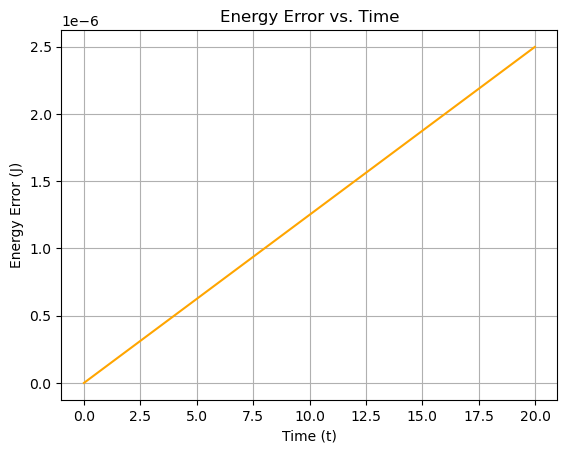

In [6]:
# Step 7: evaluate the energy (error) of the system

# TODO:
# Calculate Kinetic Energy (KE) and Potential Energy (PE)
KE = 0.5 * m * v**2      # Kinetic energy 
PE = 0.5 * k * x**2      # Potential energy 

# Total energy 
E_total = KE + PE

# Theoretical total energy 
E_theoretical = 0.5 * k * A**2  # Initial energy (when x = A and v = 0)

# Evaluate the error 
energy_error = E_total - E_theoretical

# Plot the energy error over time
plt.plot(times, energy_error, label="Energy Error", color='orange')
plt.xlabel("Time (t)")
plt.ylabel("Energy Error (J)")
plt.title("Energy Error vs. Time")
plt.grid(True)
plt.show()

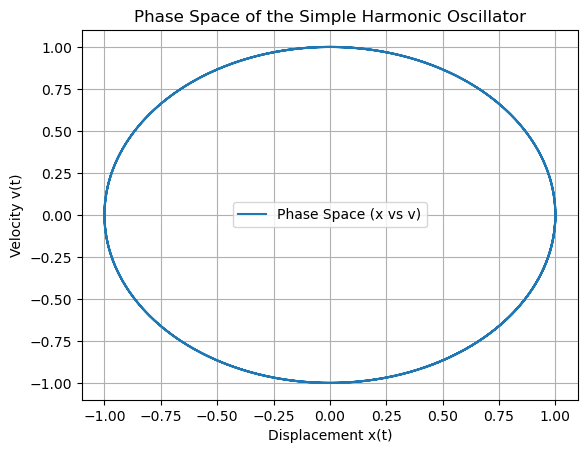

In [7]:
# Step 8: evaluate the phase space

# TODO:
# Plot the phase space (x vs v)
plt.plot(x, v, label="Phase Space (x vs v)")
plt.xlabel("Displacement x(t)")
plt.ylabel("Velocity v(t)")
plt.title("Phase Space of the Simple Harmonic Oscillator")
plt.grid(True)
plt.legend()
plt.show()

## Exercise 2: Repeat with RK4


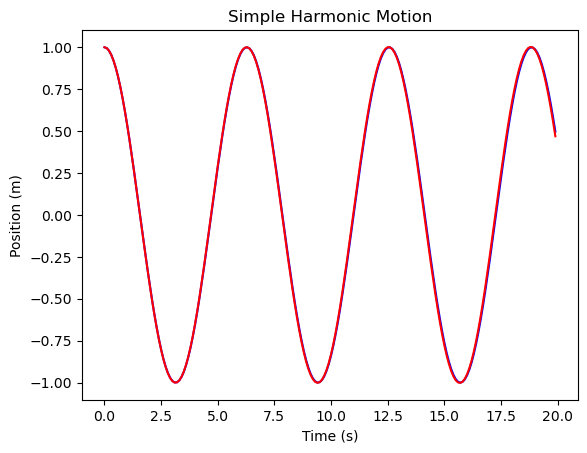

In [8]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the RK4 method
#

# TODO:

def sho_rk4(A, k, m, dt, t_max):
    
    # Step 2: set up the time and solution arrays
    times = np.arange(0, t_max, dt)
    x = np.zeros_like(times)
    v = np.zeros_like(times)

    # Step 3: set up the initial conditions
    x[0] = 1
    v[0] = 0

    # Step 4: solve the difference equation using the RK4 method
    for i in range(1,len(times)):

        y = np.array([x[i-1], v[i-1]])  # y = (x , v)
        t = times[i-1]
        h = dt
        
        def f(t, y):
            return np.array([y[1], -omega0**2*y[0]])
            
        k1 = f(t, y)
        k2 = f(t+dt/2, y+k1*dt/2)
        k3 = f(t+dt/2, y+k2*dt/2)
        k4 = f(t+dt/2, y+k3*dt)

        ynext = y + (k1+2*k2+2*k3+k4)*dt/6

        x[i] = ynext[0]
        v[i] = ynext[1]

    return times, x, v

# Example usage
A = 1      
k = 1      
m = 1      
dt = 0.1  
t_max = 20 

# Call the RK4 function
t, x_rk4, v_rk4 = sho_rk4(A, k, m, dt, t_max)
t, x_rk2, v_rk2 = sho_rk2(A, k, m, dt, t_max)
plt.plot(t, x_rk4, color = 'blue')
plt.plot(t, x_rk2, color = 'red')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.show()

## Mini homework: Repeat with Leap-frog

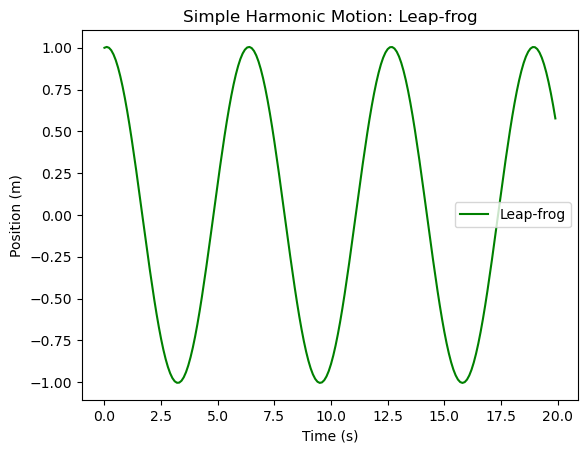

In [12]:
# Leap-frog method for Simple Harmonic Oscillator
def sho_leapfrog(A, k, m, dt, t_max):
    
    # Step 2: set up the time and solution arrays
    times = np.arange(0, t_max, dt)
    x = np.zeros_like(times)
    v = np.zeros_like(times)

    # Step 3: set up the initial conditions
    x[0] = 1   # Initial position
    v_half = 0 - (dt / 2) * (-k/m * x[0])  # First half-step for velocity

    # Step 4: solve the difference equation using the Leap-frog method
    for i in range(1, len(times)):
        # Full step for position
        x[i] = x[i-1] + v_half * dt
        
        # Full step for velocity at the half-step
        v_half = v_half + (-k/m * x[i]) * dt
    
    return times, x

# Example usage
A = 1      # Amplitude
k = 1      # Spring constant
m = 1      # Mass
dt = 0.1   # Time step
t_max = 20 # Maximum time

# Call the Leap-frog function
t, x_leapfrog = sho_leapfrog(A, k, m, dt, t_max)


# Plotting the results
plt.plot(t, x_leapfrog, label='Leap-frog', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion: Leap-frog')
plt.legend()
plt.show()


# do convergence test for 4 methods
1. Euler Method (First-order method):
2. RK2 Method (Second-order method):
3. Leap-frog Method (Second-order method):The Leap-frog method, like RK2, is a second-order method. Halving the time step size should reduce the error by a factor of four.
4. RK4 Method (Fourth-order method):

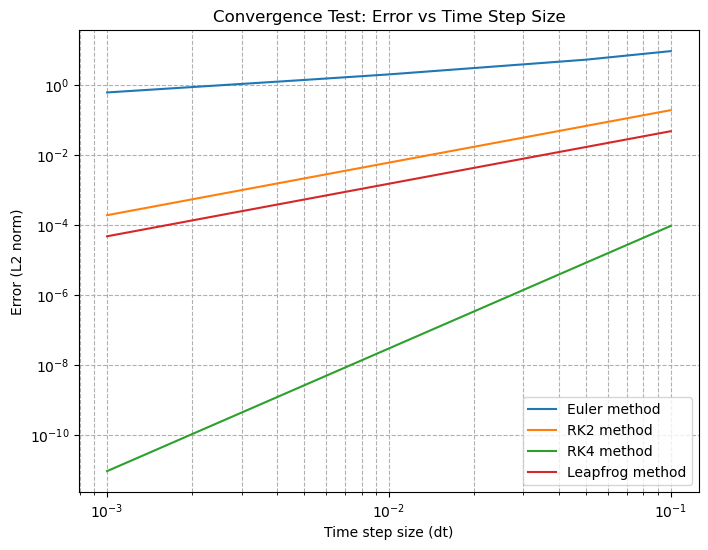

In [10]:
import solver as solver
def derive_func(y,K,M):
    f = np.zeros(len(y))
    f[0] = y[1]           # y'[0] = v
    f[1] = -K * y[0]/M        # y'[1] = a = F/M
    return f

def true_solution(t, A, omega):
    return A * np.cos(omega * t)

def calculate_error(numerical_sol, t_eval, A, omega):
    true_sol = true_solution(t_eval, A, omega)
    # Calculate the L2 norm of the error
    error = np.linalg.norm(numerical_sol[0] - true_sol)
    return error

def convergence_test():
    t_span = (0, 20) # from t=0 to t=20
    y0 = np.array([1, 0])  # initial condition：x(0) = 1, v(0) = 0
    K = 1
    M = 1
    omega = np.sqrt(K / M)  
    methods = ["Euler", "RK2", "RK4", "Leapfrog"]
    time_steps = [0.1, 0.05, 0.01, 0.005, 0.001]  # different time step sizes
    errors = {method: [] for method in methods}

    for dt in time_steps:
        t_eval = np.arange(t_span[0], t_span[1], dt)
        for method in methods:
            sol = solver.solve_ivp(derive_func, t_span, y0, method=method, t_eval=t_eval, args=(K, M))
            error = calculate_error(sol, t_eval, 1, omega)
            errors[method].append(error)

    # Plot the error vs time step size
    plt.figure(figsize=(8, 6))
    for method in methods:
        plt.loglog(time_steps, errors[method], label=f'{method} method')
    
    plt.xlabel('Time step size (dt)')
    plt.ylabel('Error (L2 norm)')
    plt.title('Convergence Test: Error vs Time Step Size')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()


# do the convergence test
convergence_test()